<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

15:31:56 INFO << load arm CSV.
15:31:56 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, 7, 1, pf_order)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:36<00:00, 12.26s/it]


In [6]:
# pf.plot_global_event()

In [7]:
for i in range(len(pfs)):
    print(pfs[i].primitive_df)

     hand_side        AI            VI       SMA       AAE            ARE
0         left  0.337924  2.369709e-05  0.567000  0.114216     191.667534
1        right  0.182380  1.020610e-04  0.306667  0.033365  119598.237111
2         left  0.359329  7.733747e-07  0.604000  0.129118     133.613271
3        right  0.222031  1.158585e-05  0.334500  0.049309  114988.295021
4         left  0.353843  3.472095e-07  0.590000  0.125205     219.251560
5        right  0.281050  0.000000e+00  0.477000  0.078989  102196.193781
6         left  0.325767  8.594093e-05  0.538000  0.106210     441.835951
7        right  0.290235  8.739277e-06  0.482000  0.084245   91566.817451
8         left  0.302439  5.574074e-05  0.492000  0.091525     520.825979
9        right  0.323997  1.025405e-05  0.552000  0.104984   78189.174958
10        left  0.278878  0.000000e+00  0.451000  0.077773     266.629454
11       right  0.288107  2.177126e-03  0.430000  0.085183   66318.374288
12        left  0.266627  0.000000e+00

In [8]:
model = Model(k_centroid=50)
model.fit(pfs[TRAIN_ORDER - 1])

100%|██████████| 361/361 [00:52<00:00,  6.94it/s]


In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 5, 6], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

predicting 1 performance


100%|██████████| 361/361 [00:51<00:00,  6.97it/s]


============  left arm ============
Normalized confusion matrix
[[ 0.75416667  0.17916667  0.025       0.02916667  0.0125      0.        ]
 [ 0.80519481  0.14285714  0.02597403  0.02597403  0.          0.        ]
 [ 0.66666667  0.16666667  0.16666667  0.          0.          0.        ]
 [ 0.5         0.125       0.125       0.125       0.125       0.        ]
 [ 0.08        0.          0.          0.08        0.76        0.08      ]
 [ 0.2         0.          0.          0.          0.8         0.        ]]


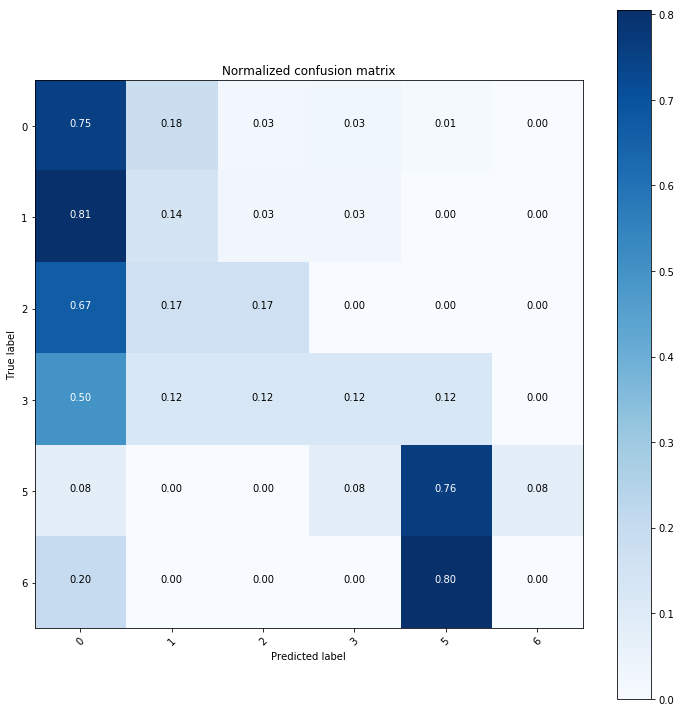

============ right arm ============
Normalized confusion matrix
[[ 0.99166667  0.          0.          0.          0.00833333  0.        ]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 0.28        0.          0.          0.          0.72        0.        ]
 [ 0.6         0.          0.          0.          0.4         0.        ]]


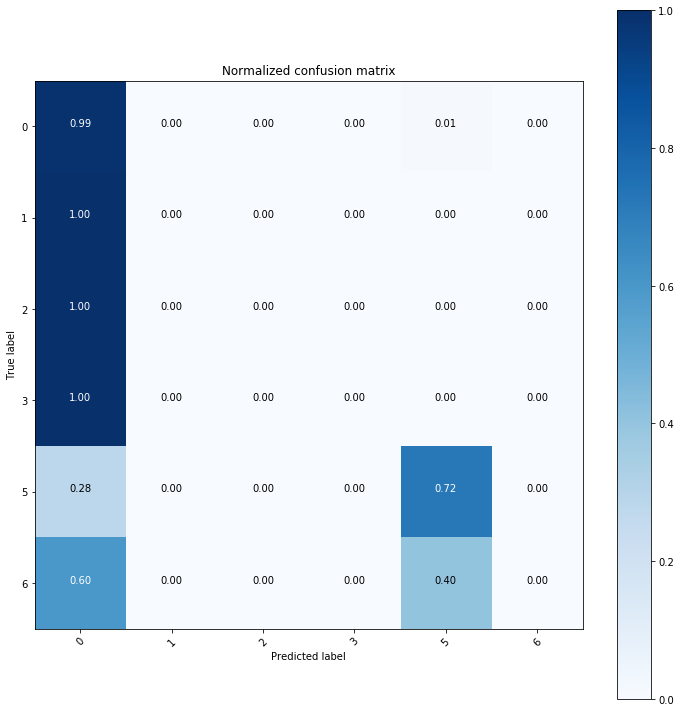

predicting 2 performance


100%|██████████| 361/361 [00:51<00:00,  6.98it/s]


============  left arm ============
Normalized confusion matrix
[[ 0.68333333  0.20833333  0.05416667  0.04583333  0.00833333  0.        ]
 [ 0.75324675  0.12987013  0.1038961   0.01298701  0.          0.        ]
 [ 0.66666667  0.16666667  0.16666667  0.          0.          0.        ]
 [ 0.5         0.          0.          0.375       0.125       0.        ]
 [ 0.28        0.          0.          0.          0.72        0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]]


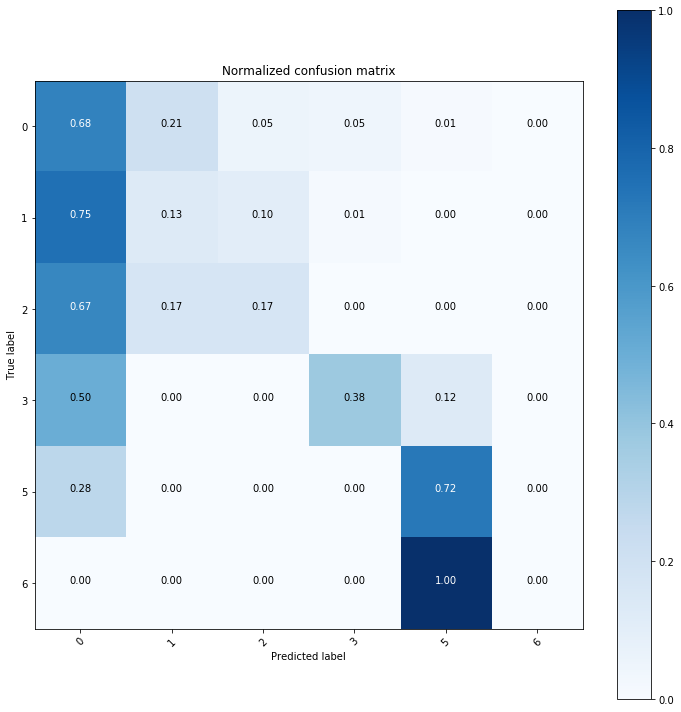

============ right arm ============
Normalized confusion matrix
[[ 0.9875  0.      0.      0.      0.0125  0.    ]
 [ 1.      0.      0.      0.      0.      0.    ]
 [ 1.      0.      0.      0.      0.      0.    ]
 [ 1.      0.      0.      0.      0.      0.    ]
 [ 0.2     0.      0.      0.      0.8     0.    ]
 [ 0.6     0.      0.      0.      0.4     0.    ]]


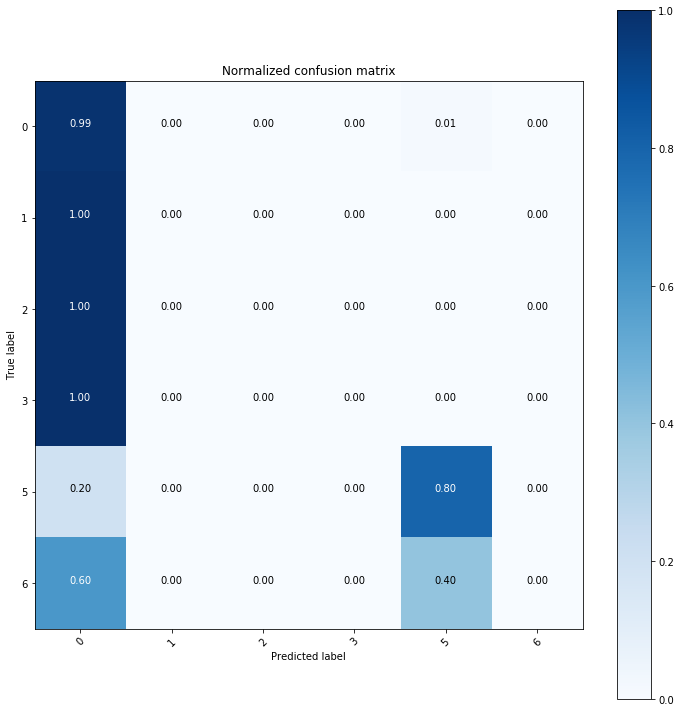

predicting 3 performance


100%|██████████| 361/361 [00:51<00:00,  6.94it/s]


============  left arm ============
Normalized confusion matrix
[[ 0.99166667  0.00833333  0.          0.          0.          0.        ]
 [ 0.22077922  0.77922078  0.          0.          0.          0.        ]
 [ 0.16666667  0.          0.83333333  0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


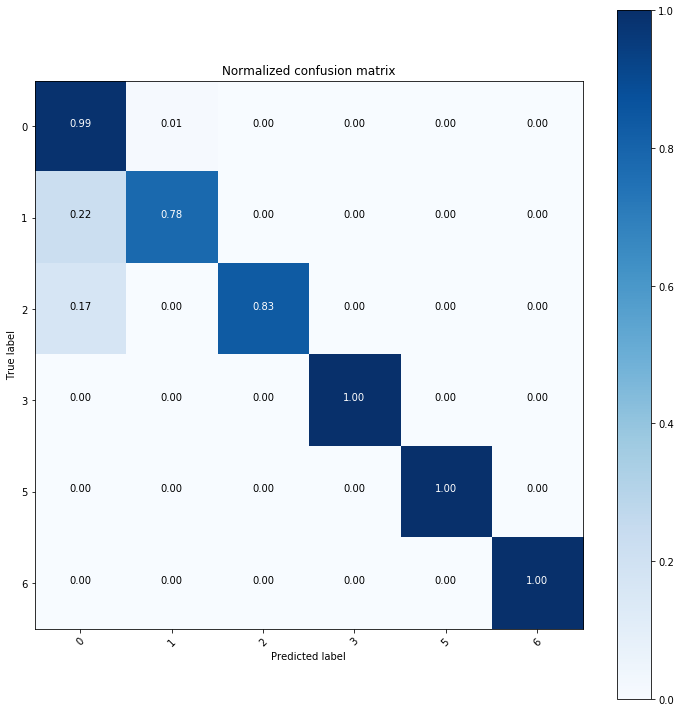

============ right arm ============
Normalized confusion matrix
[[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.31168831  0.68831169  0.          0.          0.          0.        ]
 [ 0.33333333  0.          0.66666667  0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


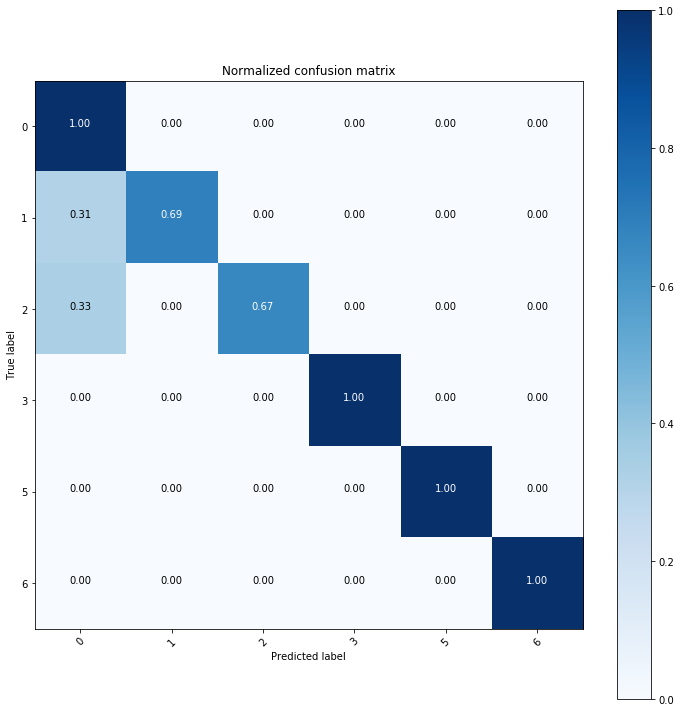

In [10]:
for od in range(len(pfs)):
    print('predicting %d performance' % (od + 1))
    left_y, right_y, y = model.predict(pfs[od])
    
    print('============  left arm ============')
    cutstom_output_cnf_matrix(y, left_y)
    
    print('============ right arm ============')
    cutstom_output_cnf_matrix(y, right_y)